## Loan Data Analysis and Predict Loan Defaulted or Not at Initial Stage
Project is divided into five main parts:
#### 1. Data understanding
#### 2. Data cleaning
#### 3. Data Analysis
#### 4. Prediction done by simple logistics regression
#### 5. Hyperparameter tunning



###  Open required modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### Open CSV file

In [3]:
df = pd.read_csv("loan.csv",low_memory=False)
df.shape

(39715, 111)

### Data Understanding

In [4]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#how many missing value in each column
np.array(df.isna().sum())

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,  2458,  1075,     0,     0,     0,     0,     0,     0,
           0, 12940,     0,    11,     0,     0,     0,     0,     0,
           0, 25680, 36929,     0,     0,     0,    50,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
          71,     0, 38575,     2,    56, 39715,     0,     0, 39715,
       39715, 39715,     0, 39715, 39715, 39715, 39715, 39715, 39715,
       39715, 39715, 39715, 39715, 39715, 39715, 39715, 39715, 39715,
       39715, 39715, 39715, 39715, 39715, 39715,    56,     0, 39715,
       39715, 39715, 39715, 39715, 39715, 39715, 39715, 39715, 39715,
       39715, 39715, 39715, 39715, 39715, 39715, 39715, 39715, 39715,
       39715, 39715, 39715, 39715, 39715, 39715,   697,    39, 39715,
       39715, 39715, 39715], dtype=int64)

In [6]:
#column names
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
# access specific raws and columns in dataset by index
df.iloc[:5,[16,11]]

,loan_status,emp_length
0,Fully Paid,10+ years
1,Fully Paid,10+ years
2,Current,1 year
3,Fully Paid,3 years
4,Fully Paid,8 years


### Data Cleaning

#### ~Missing value

In [8]:
#remove missing value columns
df1 = df.copy()
for col in df1.columns:
    if df1[col].isna().sum()>0:
        df1.drop(col,axis = 1,inplace = True)
df1['emp_length'] =df['emp_length']
df1.shape

(39715, 44)

In [9]:
#how many unique items in each column
unique = {}
for col in df1.columns:
     unique[col] =len(df1[col].unique())
np.array(unique)

array({'id': 39715, 'member_id': 39715, 'loan_amnt': 885, 'funded_amnt': 1041, 'funded_amnt_inv': 8205, 'term': 2, 'int_rate': 371, 'installment': 15383, 'grade': 7, 'sub_grade': 35, 'home_ownership': 5, 'annual_inc': 5318, 'verification_status': 3, 'issue_d': 55, 'loan_status': 3, 'pymnt_plan': 1, 'url': 39715, 'purpose': 14, 'zip_code': 823, 'addr_state': 50, 'dti': 2868, 'delinq_2yrs': 11, 'earliest_cr_line': 526, 'inq_last_6mths': 9, 'open_acc': 40, 'pub_rec': 5, 'revol_bal': 21711, 'total_acc': 82, 'initial_list_status': 1, 'out_prncp': 1137, 'out_prncp_inv': 1138, 'total_pymnt': 37849, 'total_pymnt_inv': 37516, 'total_rec_prncp': 7975, 'total_rec_int': 35148, 'total_rec_late_fee': 1356, 'recoveries': 4039, 'collection_recovery_fee': 2616, 'last_pymnt_amnt': 34929, 'policy_code': 1, 'application_type': 1, 'acc_now_delinq': 1, 'delinq_amnt': 1, 'emp_length': 12},
      dtype=object)

#### ~Variability

In [10]:
#remove highly variable and non-variable features
for col in df1.columns:
    if len(df1[col].unique()) > 20000 or len(df1[col].unique())==1 :
        df1.drop(col,axis = 1,inplace = True)
df1.shape

(39715, 30)

In [11]:
#check dependency of each column with loan_status
df1[['loan_status','zip_code']].sample(10)

,loan_status,zip_code
11718,Fully Paid,601xx
12425,Fully Paid,331xx
20967,Fully Paid,945xx
6804,Fully Paid,303xx
14788,Current,492xx
17395,Fully Paid,549xx
30196,Fully Paid,627xx
34738,Fully Paid,941xx
3123,Fully Paid,100xx
8491,Fully Paid,060xx


In [12]:
#list of column which is not depend on loan_status
col_to_remove = ['funded_amnt', 'funded_amnt_inv',
        'sub_grade', 'issue_d','addr_state', 'delinq_2yrs', 'earliest_cr_line','inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc','out_prncp','out_prncp_inv',
        'out_prncp_inv', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','zip_code']
df1.drop(col_to_remove,axis =1,errors = 'ignore',inplace = True)
df1.shape

(39715, 12)

In [13]:
#we try to remove 'Current' case from loan_status
df1_new = df1[df1.loan_status != 'Current']
df1_new.shape

(38575, 12)

In [14]:
#remove raws which have missing value and 'None' 
df1_new= df1_new[df1_new.isnull().sum(axis=1)==0]
df1_new = df1_new[df1_new.home_ownership != 'NONE']
df1_new.shape

(37539, 12)

In [15]:
df1_new.loan_status.value_counts()

Fully Paid     32141
Charged Off     5398
Name: loan_status, dtype: int64

#### ~Correction in Data types

In [16]:
#convert loan status into binary, 0 for paid 1 for default
df2 = df1_new.copy()
df2['loan_status'] = df1_new['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)
df2.loan_status.value_counts()

0    32141
1     5398
Name: loan_status, dtype: int64

In [17]:
df2[['int_rate','emp_length']].head()

,int_rate,emp_length
0,15.96%,10+ years
1,13.49%,10+ years
3,7.90%,3 years
4,15.96%,8 years
5,18.64%,9 years


In [18]:
#convert object datatype to int64 
df2['int_rate'] = df1_new['int_rate'].apply(lambda x:pd.to_numeric(x.split('%')[0]))
import re
df2['emp_length'] = df1_new['emp_length'].apply(lambda x: pd.to_numeric(re.findall('\d+',str(x))[0]))
df2.head(5)

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,emp_length
0,2400,36 months,15.96,84.33,C,RENT,12252.0,Not Verified,0,small_business,8.72,10
1,10000,36 months,13.49,339.31,C,RENT,49200.0,Source Verified,0,other,20.00,10
3,5000,36 months,7.90,156.46,A,RENT,36000.0,Source Verified,0,wedding,11.20,3
4,7000,60 months,15.96,170.08,C,RENT,47004.0,Not Verified,0,debt_consolidation,23.51,8
5,3000,36 months,18.64,109.43,E,RENT,48000.0,Source Verified,0,car,5.35,9


### Data Analysis

#### ~Univariate Analysis

In [19]:
# default rate
round(np.mean(df2['loan_status']), 2)

0.14

<AxesSubplot:xlabel='int_rate', ylabel='loan_status'>

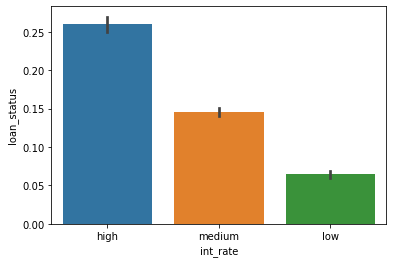

In [20]:
# plotting default rates across interest rate of the loan
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
   
df3 = df2.copy()
df3['int_rate'] = df2['int_rate'].apply(lambda x: int_rate(x))
sns.barplot(x = 'int_rate',y = 'loan_status',data = df3)

<AxesSubplot:xlabel='emp_length', ylabel='loan_status'>

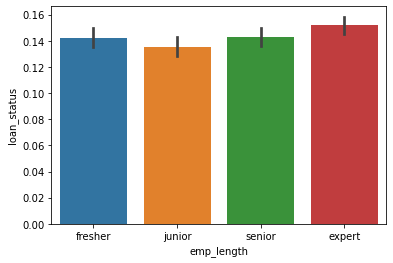

In [21]:
# plotting default rates across employment experience in year
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df3['emp_length'] = df2['emp_length'].apply(lambda x: emp_length(x))
sns.barplot(x = 'emp_length',y = 'loan_status',data = df3,order = ['fresher','junior','senior','expert'])

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

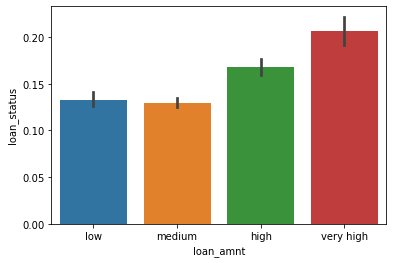

In [22]:
# plotting default rates across loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df3['loan_amnt'] = df2['loan_amnt'].apply(lambda x: loan_amount(x))
sns.barplot(x = 'loan_amnt',y = 'loan_status',data = df3)

<AxesSubplot:xlabel='dti', ylabel='loan_status'>

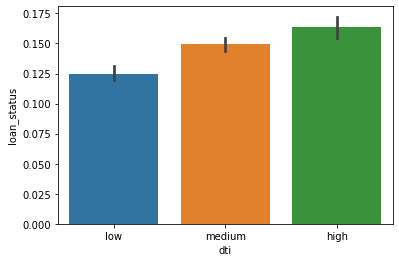

In [23]:
# plotting default rates across debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'

df3['dti'] = df2['dti'].apply(lambda x: dti(x))
sns.barplot(x = 'dti',y = 'loan_status',data = df3)

<AxesSubplot:xlabel='installment', ylabel='loan_status'>

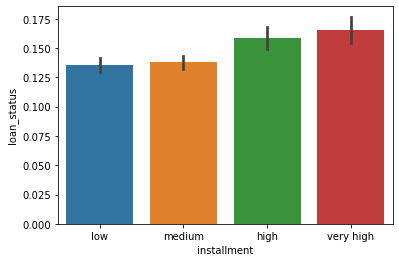

In [24]:
# plotting default rates across installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
   
df3['installment'] = df2['installment'].apply(lambda x: installment(x))
sns.barplot(x = 'installment',y = 'loan_status',data = df3)

<AxesSubplot:xlabel='annual_inc', ylabel='loan_status'>

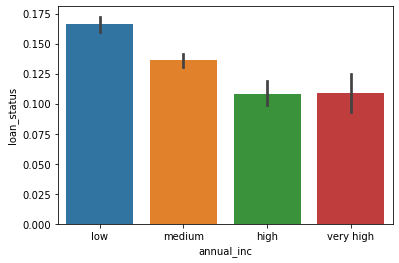

In [25]:
# plotting default rates across annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df3['annual_inc'] = df2['annual_inc'].apply(lambda x: annual_income(x))
sns.barplot(x = 'annual_inc',y = 'loan_status',data = df3)

<AxesSubplot:xlabel='term', ylabel='loan_status'>

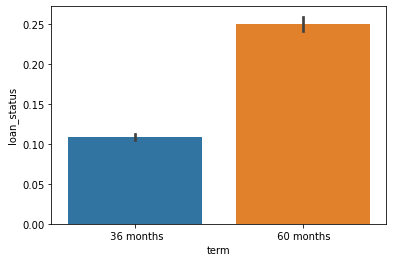

In [26]:
# plotting default rates across term
sns.barplot(x = 'term',y = 'loan_status',data = df2)

<AxesSubplot:xlabel='grade', ylabel='loan_status'>

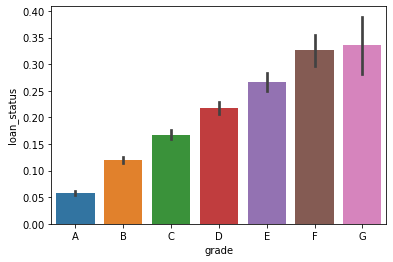

In [27]:
# plotting default rates across grade of loan
sns.barplot(x = 'grade',y = 'loan_status',data = df2,order = ['A','B','C','D','E','F','G'])

<AxesSubplot:xlabel='home_ownership', ylabel='loan_status'>

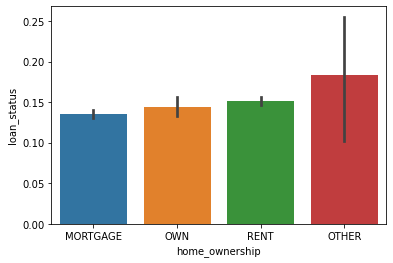

In [28]:
# plotting default rates across home_ownership
sns.barplot(x = 'home_ownership',y = 'loan_status',data = df2,order = ['MORTGAGE','OWN','RENT','OTHER'])

<AxesSubplot:xlabel='verification_status', ylabel='loan_status'>

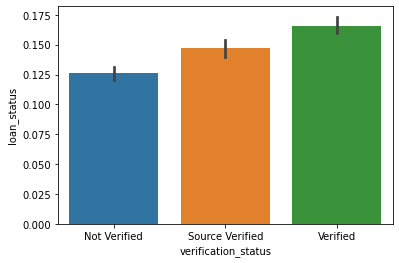

In [29]:
# plotting default rates across verification_status
sns.barplot(x = 'verification_status',y = 'loan_status',data = df2)

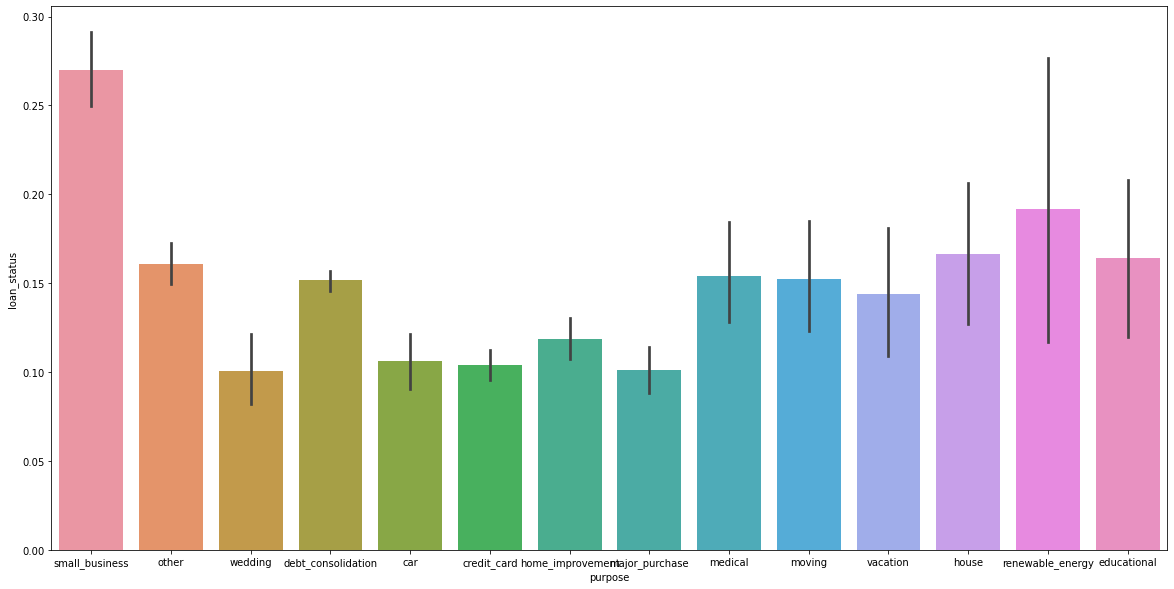

In [30]:
# plotting default rates across purpose of the loan
plt.figure(figsize = (20,10))
sns.barplot(x = 'purpose',y = 'loan_status',data = df2)
plt.show()

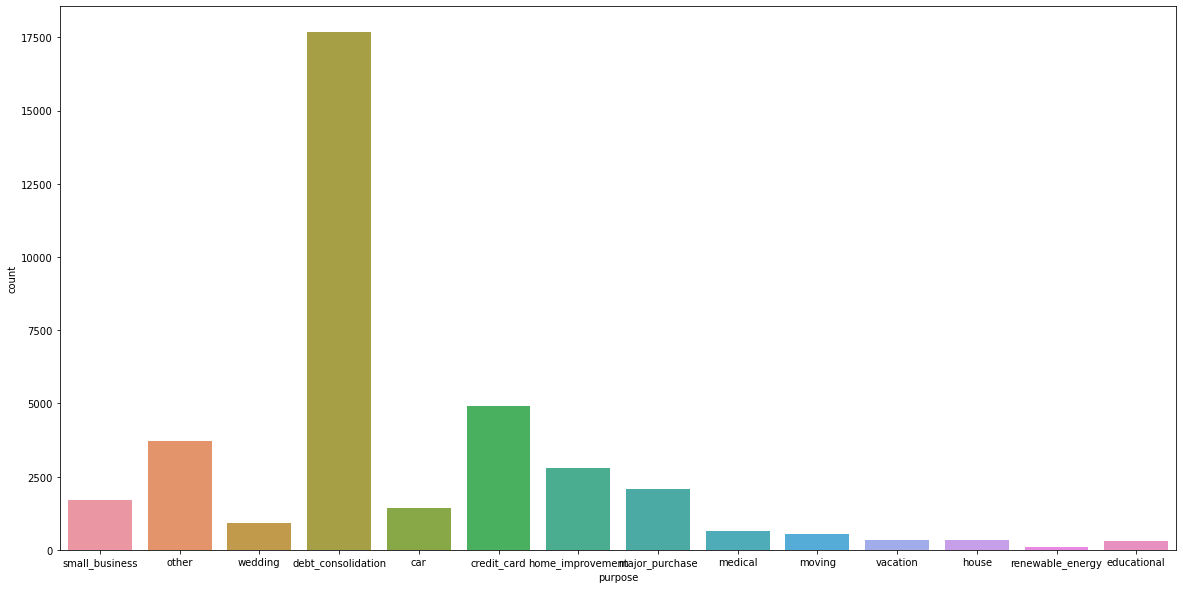

In [31]:
#count default for each purpose
plt.figure(figsize=(20, 10))
sns.countplot(x='purpose', data=df2)
plt.show()

####  ~Segmented Univariate Analysis

<AxesSubplot:xlabel='purpose', ylabel='count'>

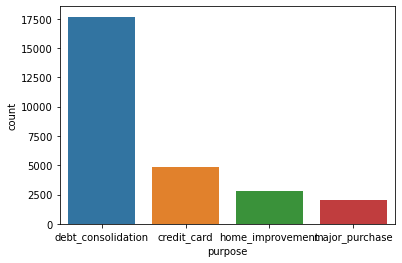

In [32]:
#filtering the dataframe according to major purpose
df4 = df3.copy()
df4 = df3[df3['purpose'].isin(["credit_card","debt_consolidation","home_improvement","major_purchase"])]
sns.countplot(x=df4['purpose'])

In [33]:
# function for segmented plot
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df4)
    plt.show()

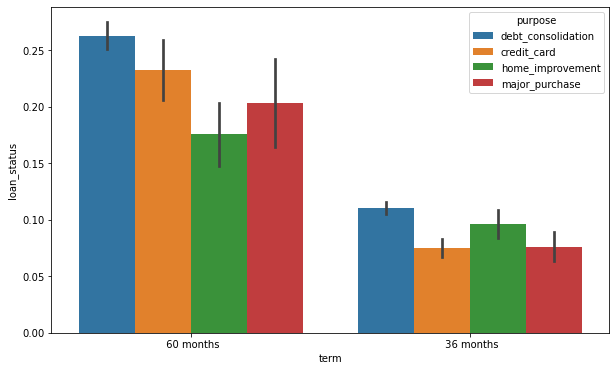

In [34]:
#term
plot_segmented('term')

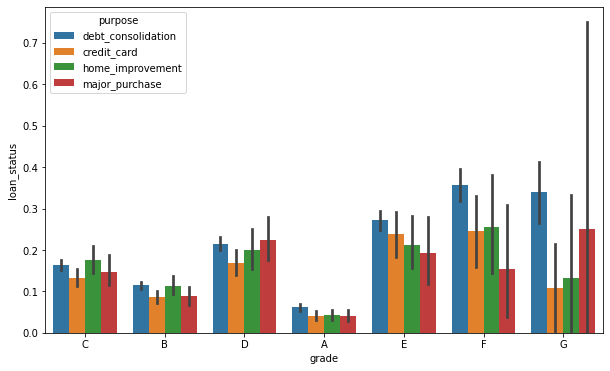

In [35]:
#grade
plot_segmented('grade')

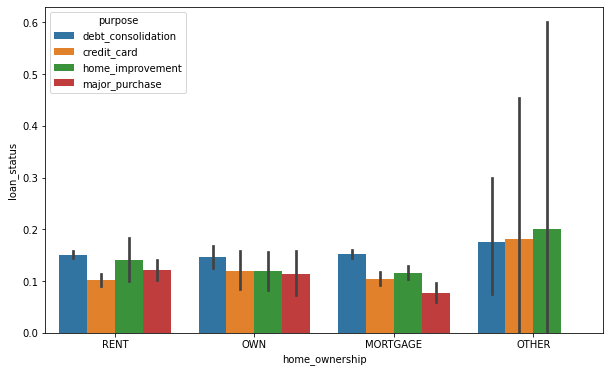

In [36]:
#home ownership
plot_segmented('home_ownership')

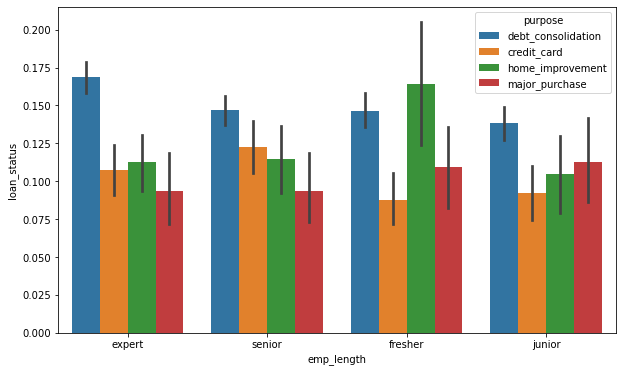

In [37]:
#employment experience
plot_segmented('emp_length')

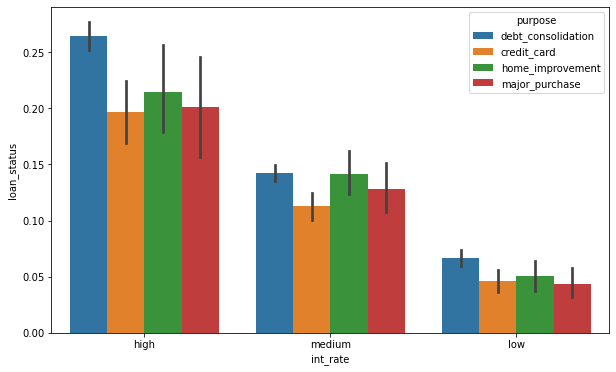

In [38]:
#interest rate
plot_segmented('int_rate')

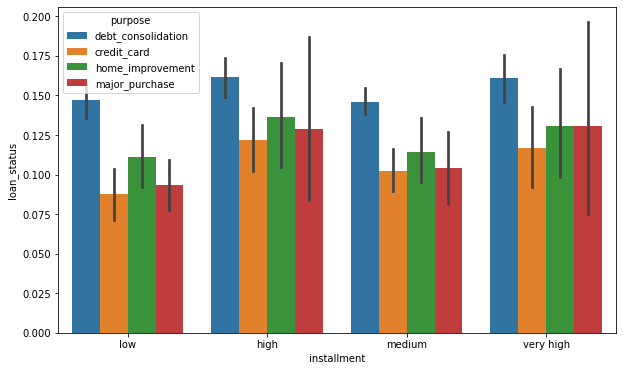

In [39]:
# installment
plot_segmented('installment')

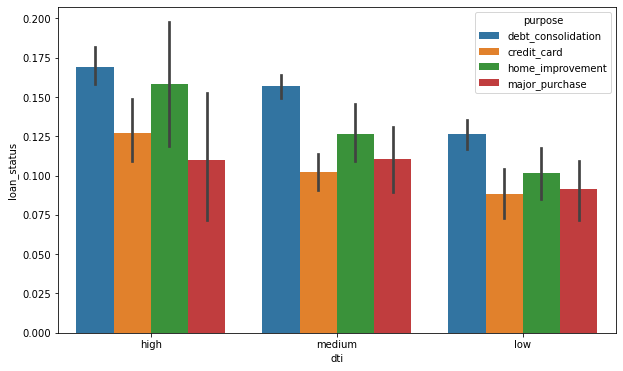

In [40]:
#debt to income ratio
plot_segmented('dti')

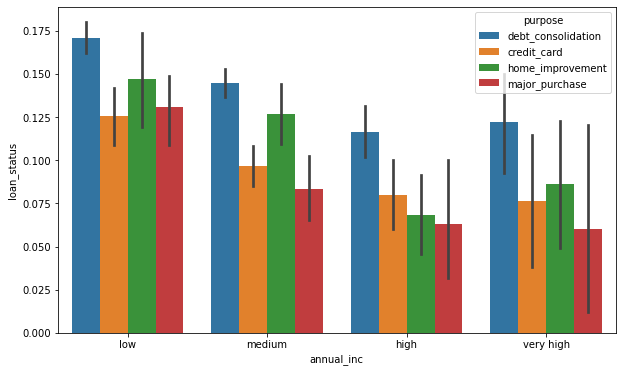

In [41]:
#annual income
plot_segmented('annual_inc')

### Build a prediction model

In [42]:
df1.head(10)

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,emp_length
0,2400,36 months,15.96%,84.33,C,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,10+ years
1,10000,36 months,13.49%,339.31,C,RENT,49200.0,Source Verified,Fully Paid,other,20.00,10+ years
2,3000,60 months,12.69%,67.79,B,RENT,80000.0,Source Verified,Current,other,17.94,1 year
3,5000,36 months,7.90%,156.46,A,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,3 years
4,7000,60 months,15.96%,170.08,C,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,23.51,8 years
5,3000,36 months,18.64%,109.43,E,RENT,48000.0,Source Verified,Fully Paid,car,5.35,9 years
6,5600,60 months,21.28%,152.39,F,OWN,40000.0,Source Verified,Charged Off,small_business,5.55,4 years
7,5375,60 months,12.69%,121.45,B,RENT,15000.0,Verified,Charged Off,other,18.08,< 1 year
8,6500,60 months,14.65%,153.45,C,OWN,72000.0,Not Verified,Fully Paid,debt_consolidation,16.12,5 years
9,12000,36 months,12.69%,402.54,B,OWN,75000.0,Source Verified,Fully Paid,debt_consolidation,10.78,10+ years


#### ~Labelencoding for categorical variable 

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = df1.copy()
dfle.term = le.fit_transform(dfle.term)
dfle.grade = le.fit_transform(dfle.grade)
dfle.verification_status = le.fit_transform(dfle.verification_status)
dfle.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,emp_length
0,2400,0,15.96%,84.33,2,RENT,12252.0,0,Fully Paid,small_business,8.72,10+ years
1,10000,0,13.49%,339.31,2,RENT,49200.0,1,Fully Paid,other,20.00,10+ years
2,3000,1,12.69%,67.79,1,RENT,80000.0,1,Current,other,17.94,1 year
3,5000,0,7.90%,156.46,0,RENT,36000.0,1,Fully Paid,wedding,11.20,3 years
4,7000,1,15.96%,170.08,2,RENT,47004.0,0,Fully Paid,debt_consolidation,23.51,8 years


#### ~Encoding for Ordinal categorical variable

In [44]:
X = dfle[['home_ownership','purpose']]
y = dfle.loan_status

In [45]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['MORTGAGE','OWN','RENT','OTHER','NONE'],['wedding','major_purchase','credit_card','car','home_improvement',
                                 'vacation','debt_consolidation','moving','medical','other','educational','house','renewable_energy','small_business']],
                                dtype='int32')
X_oe = oe.fit_transform(X)
encoder = pd.DataFrame(X_oe,columns = ['home_ownership_encoder','purpose_encoder'])
encoder

,home_ownership_encoder,purpose_encoder
0,2,13
1,2,9
2,2,9
3,2,0
4,2,6
...,...,...
39710,0,4
39711,2,2
39712,0,6
39713,0,9


In [83]:
dfle1= pd.concat([dfle,encoder],axis = 1)
dfle1.shape

(39715, 14)

In [84]:
dfle2= dfle1[dfle1.isnull().sum(axis=1)==0]
dfle2 = dfle2[dfle2.loan_status != 'Current']
dfle2.shape

(37542, 14)

In [145]:
dfle3 = dfle2.copy()
dfle3['loan_status'] = dfle2['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)
dfle3.loan_status.value_counts()

0    32144
1     5398
Name: loan_status, dtype: int64

In [146]:
dfle3 = dfle3[dfle3.home_ownership != 'NONE']
dfle3.shape

(37539, 14)

In [150]:
dfle3['int_rate'] = dfle2['int_rate'].apply(lambda x:pd.to_numeric(x.split('%')[0]))
import re
dfle3['emp_length'] = dfle2['emp_length'].apply(lambda x: pd.to_numeric(re.findall('\d+',str(x))[0]))
dfle3.sample(5)

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,emp_length,home_ownership_encoder,purpose_encoder
27835,8000,0,13.23,270.44,2,MORTGAGE,73000.0,1,0,debt_consolidation,1.05,3,0,6
19994,8000,0,7.29,248.08,0,RENT,80000.0,1,1,major_purchase,10.81,10,2,1
12212,14000,0,9.99,451.68,1,OWN,47000.0,0,0,debt_consolidation,17.97,8,1,6
19888,13700,1,19.36,358.11,5,RENT,30000.0,0,1,other,19.88,1,2,9
20427,20000,1,16.40,490.63,4,MORTGAGE,82284.0,1,0,other,15.94,10,0,9


#### ~Data Scaling

In [96]:
from scipy import stats 
from mlxtend.preprocessing import minmax_scaling

In [97]:
#loan amount(max:35000,min:500), installment(max:1305.19,min:15.69), Annual income(max:6000000.0,min:4000.0) 
col = ['loan_amnt','installment','annual_inc']
for item in col:
    dfle3[item] = minmax_scaling(dfle3[item],columns = [0])
dfle3.head(5)

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,emp_length,home_ownership_encoder,purpose_encoder
0,0.055072,0,15.96,0.053230,2,RENT,0.001376,0,0,small_business,8.72,10,2,13
1,0.275362,0,13.49,0.250965,2,RENT,0.007538,1,0,other,20.00,10,2,9
3,0.130435,0,7.90,0.109166,0,RENT,0.005337,1,0,wedding,11.20,3,2,0
4,0.188406,1,15.96,0.119729,2,RENT,0.007172,0,0,debt_consolidation,23.51,8,2,6
5,0.072464,0,18.64,0.072695,4,RENT,0.007338,1,0,car,5.35,9,2,3


In [112]:
dfle3.drop(['home_ownership','purpose','grade','verification_status'],axis = 1,inplace=True,errors = 'ignore')
dfle3.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,emp_length,home_ownership_encoder,purpose_encoder
0,0.055072,0,15.96,0.053230,0.001376,0,8.72,10,2,13
1,0.275362,0,13.49,0.250965,0.007538,0,20.00,10,2,9
3,0.130435,0,7.90,0.109166,0.005337,0,11.20,3,2,0
4,0.188406,1,15.96,0.119729,0.007172,0,23.51,8,2,6
5,0.072464,0,18.64,0.072695,0.007338,0,5.35,9,2,3


#### ~Remove Outliers

In [113]:
loan = dfle3[dfle3.annual_inc<0.2]
loan.shape

(37531, 10)

In [114]:
x = loan.drop('loan_status',axis = 1)
y = loan.loan_status

#### ~Logistics Regression model

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


,loan_amnt,term,int_rate,installment,annual_inc,dti,emp_length,home_ownership_encoder,purpose_encoder
20944,0.089855,0,10.0,0.077922,0.008381,14.29,3,2,6


In [125]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'newton-cg',multi_class = 'auto',C = 10)
lr.fit(X_train,y_train)

LogisticRegression(C=10, solver='newton-cg')

In [124]:
lr.score(X_test,y_test)

0.8553350206473957

In [159]:
lr.coef_

array([[ 3.95268274e-01,  5.22198201e-01,  1.33363405e-01,
        -8.89627132e-01, -1.66982910e+01,  7.46250878e-03,
         1.29333645e-02,  4.67117585e-02,  7.50532639e-02]])

#### ~Hyperparameter Tunning

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [120]:
#define parameter for different model
om  = {
    'lr':{
        'model':LogisticRegression(),
        'params': {'C':[1,5,10],
                  'solver':['sag','saga','lbfgs','newton-cg']}
         },
    'rf':{
        'model':RandomForestClassifier(),
        'params':{'n_estimators':[1,10,100]}
         },
    'dt':{
        'model':DecisionTreeClassifier(),
        'params':{'criterion' : ["gini", "entropy"]}
        },
    'gnb':{
        'model': GaussianNB(),
        'params':{}
        },
    'mnb':{
        'model': MultinomialNB(),
        'params':{}
        },
    
    }

In [121]:
#find the best score with parameter for different model
score = []
for model_name,m_p in om.items():
    model = GridSearchCV(m_p['model'],m_p['params'],cv = 3,return_train_score = False)
    model.fit(X_train,y_train)
    score.append({'model':model_name,
                 'best_score':model.best_score_,
                 'best_param':model.best_params_
                 })

In [122]:
results = pd.DataFrame(score,columns = ['model','best_score','best_param'])
results

,model,best_score,best_param
0,lr,0.857248,"{'C': 10, 'solver': 'newton-cg'}"
1,rf,0.853717,{'n_estimators': 100}
2,dt,0.765254,{'criterion': 'entropy'}
3,gnb,0.802824,{}
4,mnb,0.847722,{}


In [72]:
xfold = loan.drop('loan_status',axis = 1).values
yfold = loan.loan_status.values

In [73]:
def get_score(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [74]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [79]:
#Implemented K-fold validation for different model
score_lr = []
score_svm = []
score_rf = []
for train_index,test_index in folds.split(xfold,yfold):
    X_train, X_test, y_train, y_test = xfold[train_index], \
                                    xfold[test_index],yfold[train_index],yfold[test_index]
    score_lr.append(get_score(LogisticRegression(),X_train, X_test, y_train, y_test))
    score_svm.append(get_score(SVC(),X_train, X_test, y_train, y_test))
    score_rf.append(get_score(RandomForestClassifier(n_estimators=40),X_train, X_test, y_train, y_test))

In [80]:
score_lr

[0.8563663975701383, 0.8545163868904876, 0.8561950439648282]

In [81]:
score_svm

[0.8562065382463432, 0.8561950439648282, 0.8561950439648282]

In [78]:
score_rf

[0.8455758932139718, 0.846123101518785, 0.8553956834532375]

In [155]:
#loan amount(max:35000,min:500), installment(max:1305.19,min:15.69), Annual income(max:6000000.0,min:4000.0) 
def predict_loan_status(loan_amnt, term, int_rate, installment,home_ownership, annual_inc,purpose, dti, emp_length):
    Loan_amount = (loan_amnt-500)/(35000-500)
    Installment = (installment-15.69)/(1305.19-15.69)
    Annual_income = (annual_inc-4000)/(6000000-4000)
    T = {'36 months':0,'60 months':1}
    Term = T[term]
    h_o = {'MORTGAGE':0,'OWN':1,'RENT':2,'OTHER':3}
    Home = h_o[home_ownership]
    p ={'wedding':0,'major_purchase':1,'credit_card':2,'car':3,'home_improvement':4,
        'vacation':5,'debt_consolidation':6,'moving':7,'medical':8,'other':9,'educational':10,
        'house':11,'renewable_energy':12,'small_business':13}
    Purpose = p[purpose]
    
    status = lr.predict(np.array([[Loan_amount, Term, int_rate, Installment, Annual_income,dti, emp_length,Home,Purpose]]))
    loan_status = {0:'Paid',1:'Default'}
    return loan_status[status[0]]

In [157]:
print(predict_loan_status(8000,'36 months',7.29,248.08,'RENT',80000.0,'major_purchase',10.81,10))

Default


### Generate pickle file

In [134]:
import pickle
with open('Loan_Analysis.pickle','wb') as f:
    pickle.dump(lr,f)

### Generate json file for column code

In [158]:
import json
C = ['loan_amnt', 'term', 'int_rate', 'installment','home_ownership', 'annual_inc','purpose', 'dti', 'emp_length']
columns = {
    'data_column': [col.lower() for col in C]
}
with open('loan_columns.json','w') as f:
    f.write(json.dumps(columns))